In [1]:
# Step 1: Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Make plots look nicer
plt.style.use("seaborn-v0_8")
sns.set_palette("Set2")


In [2]:
# Step 2: Upload CSV file in Colab
from google.colab import files
uploaded = files.upload()

# Replace with your actual file name after upload
df = pd.read_csv("Agriculture_price_dataset.csv")

# Display first few rows
df.head()


Saving Agriculture_price_dataset.csv to Agriculture_price_dataset (1).csv


,STATE,District Name,Market Name,Commodity,Variety,Grade,Min_Price,Max_Price,Modal_Price,Price Date
0,Maharashtra,nashik,Lasalgaon(Niphad),Wheat,Maharashtra 2189,FAQ,2172.0,2399.0,2300.0,6/6/2023
1,Maharashtra,satara,Patan,Tomato,Other,FAQ,1000.0,1500.0,1250.0,6/6/2023
2,Uttar Pradesh,mainpuri,Bewar,Potato,Local,FAQ,800.0,820.0,810.0,6/6/2023
3,Rajasthan,chittorgarh,Nimbahera,Wheat,Other,FAQ,2040.0,2668.0,2300.0,6/6/2023
4,Rajasthan,pratapgarh,Pratapgarh,Onion,Other,FAQ,476.0,1043.0,617.0,6/6/2023


In [3]:
# Step 3: Basic dataset info
print("Shape of dataset:", df.shape)
print("\nColumn Names:", df.columns.tolist())
print("\nData Types:\n", df.dtypes)
print("\nMissing Values:\n", df.isnull().sum())
print("\nBasic Statistics:\n", df.describe(include="all"))


Shape of dataset: (737392, 10)

Column Names: ['STATE', 'District Name', 'Market Name', 'Commodity', 'Variety', 'Grade', 'Min_Price', 'Max_Price', 'Modal_Price', 'Price Date']

Data Types:
 STATE             object
District Name     object
Market Name       object
Commodity         object
Variety           object
Grade             object
Min_Price        float64
Max_Price        float64
Modal_Price      float64
Price Date        object
dtype: object

Missing Values:
 STATE            0
District Name    0
Market Name      0
Commodity        0
Variety          0
Grade            0
Min_Price        0
Max_Price        0
Modal_Price      0
Price Date       0
dtype: int64

Basic Statistics:
                 STATE District Name Market Name Commodity Variety   Grade  \
count          737392        737392      737392    737392  737392  737392   
unique             30           373        1598         5      94       7   
top     Uttar Pradesh  bulandshahar  Pratapgarh    Potato   Other     FAQ 

In [4]:
# Step 4: Unique values in categorical columns
for col in ["STATE", "District Name", "Market Name", "Commodity", "Variety", "Grade"]:
    print(f"{col} → {df[col].nunique()} unique values")
    print(df[col].unique()[:10], "\n")


STATE → 30 unique values
['Maharashtra' 'Uttar Pradesh' 'Rajasthan' 'Haryana' 'West Bengal'
 'Himachal Pradesh' 'Gujarat' 'Meghalaya' 'Madhya Pradesh'
 'Andhra Pradesh'] 

District Name → 373 unique values
['nashik' 'satara' 'mainpuri' 'chittorgarh' 'pratapgarh' 'bharatpur'
 'ambala' 'birbhum' 'mandi' 'sambhal'] 

Market Name → 1598 unique values
['Lasalgaon(Niphad)' 'Patan' 'Bewar' 'Nimbahera' 'Pratapgarh' 'Bayana'
 'Naraingarh' 'Sainthia' 'Mandi(Takoli)' 'Muradabad'] 

Commodity → 5 unique values
['Wheat' 'Tomato' 'Potato' 'Onion' 'Rice'] 

Variety → 94 unique values
['Maharashtra 2189' 'Other' 'Local' 'Onion' 'Tomato' 'Deshi' 'Dara'
 'Kalyan' 'Red' '1st Sort'] 

Grade → 7 unique values
['FAQ' 'Medium' 'Large' 'Local' 'Non-FAQ' 'Ref grade-1' 'Ref grade-2'] 



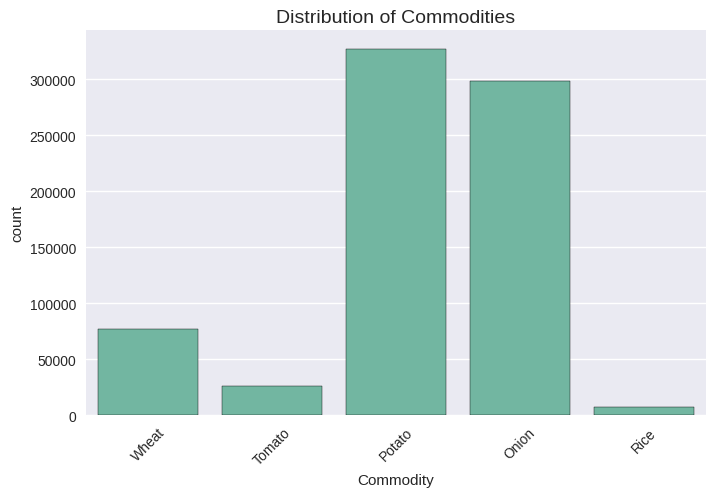

In [5]:
# Step 5: Commodity distribution
plt.figure(figsize=(8,5))
sns.countplot(x="Commodity", data=df, edgecolor="black")
plt.title("Distribution of Commodities", fontsize=14)
plt.xticks(rotation=45)
plt.show()


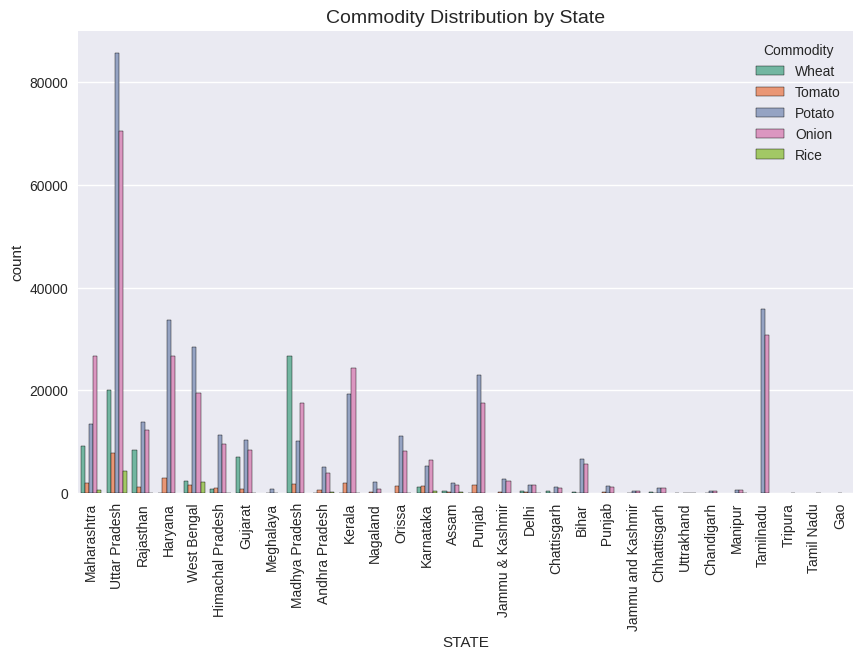

In [6]:
# Step 6: Number of entries per state
plt.figure(figsize=(10,6))
sns.countplot(x="STATE", data=df, hue="Commodity", edgecolor="black")
plt.title("Commodity Distribution by State", fontsize=14)
plt.xticks(rotation=90)
plt.legend(title="Commodity")
plt.show()


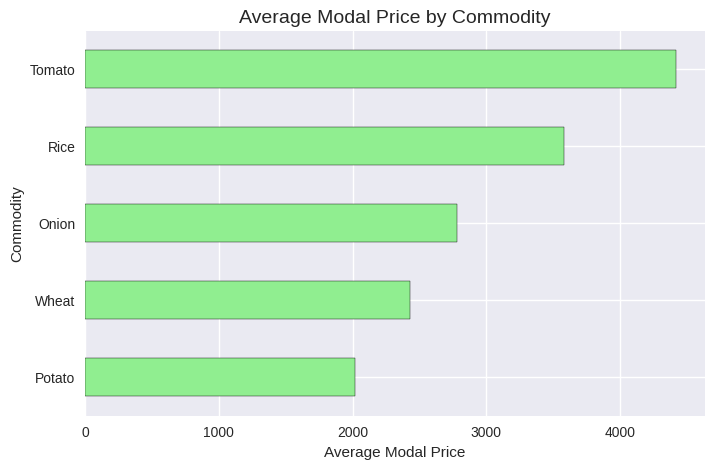

In [7]:
# Step 7: Average modal price per commodity
avg_modal = df.groupby("Commodity")["Modal_Price"].mean().sort_values()

plt.figure(figsize=(8,5))
avg_modal.plot(kind="barh", color="lightgreen", edgecolor="black")
plt.title("Average Modal Price by Commodity", fontsize=14)
plt.xlabel("Average Modal Price")
plt.ylabel("Commodity")
plt.show()


/tmp/ipython-input-1861834295.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Commodity", y="Modal_Price", data=df, palette="Set3")


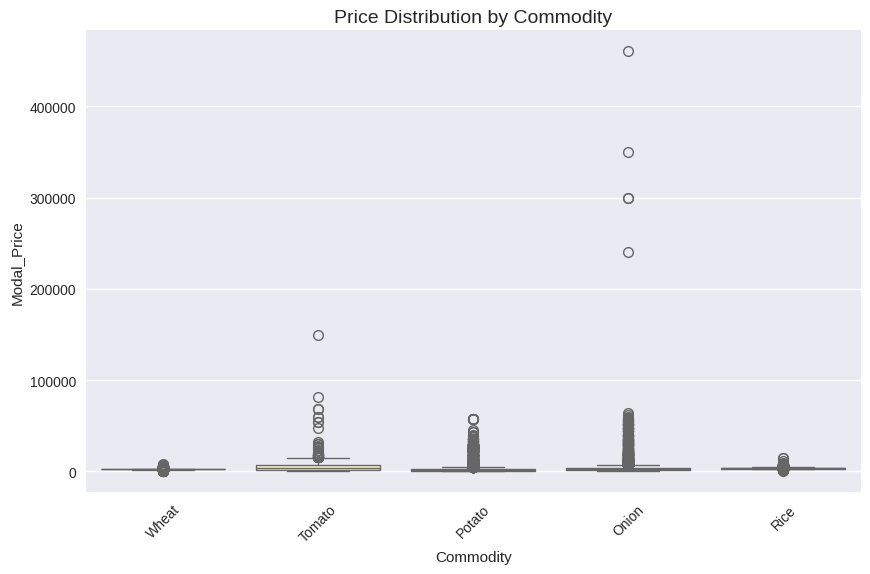

In [8]:
# Step 8: Boxplot of price distribution per commodity
plt.figure(figsize=(10,6))
sns.boxplot(x="Commodity", y="Modal_Price", data=df, palette="Set3")
plt.title("Price Distribution by Commodity", fontsize=14)
plt.xticks(rotation=45)
plt.show()


/tmp/ipython-input-346171845.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="STATE", y="Modal_Price", data=df, estimator="mean", ci=None, palette="coolwarm")
/tmp/ipython-input-346171845.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="STATE", y="Modal_Price", data=df, estimator="mean", ci=None, palette="coolwarm")


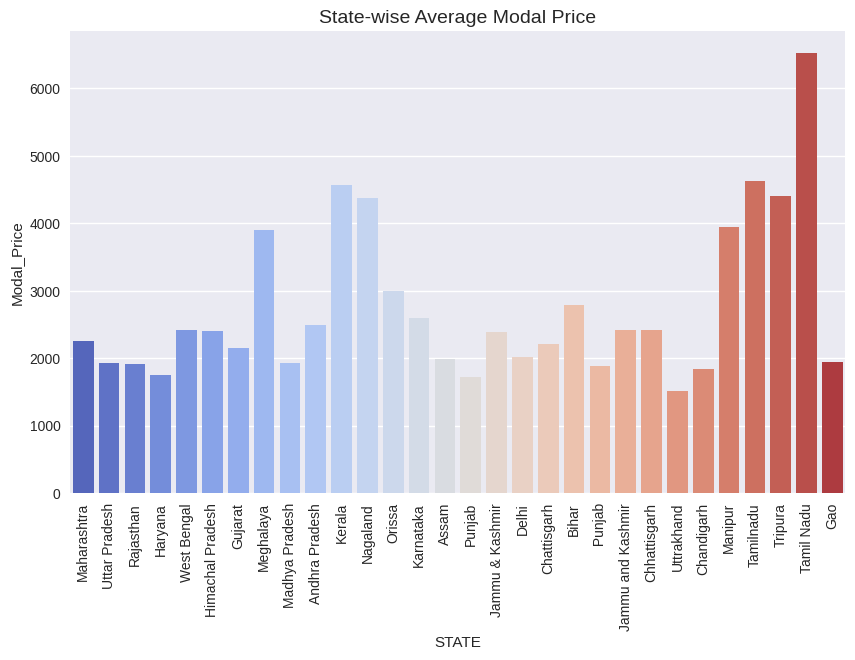

In [9]:
# Step 9: State-wise average modal price
plt.figure(figsize=(10,6))
sns.barplot(x="STATE", y="Modal_Price", data=df, estimator="mean", ci=None, palette="coolwarm")
plt.title("State-wise Average Modal Price", fontsize=14)
plt.xticks(rotation=90)
plt.show()


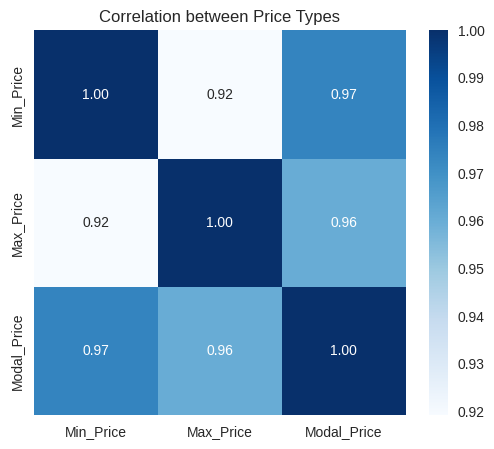

In [10]:
# Step 10: Correlation heatmap
plt.figure(figsize=(6,5))
sns.heatmap(df[["Min_Price", "Max_Price", "Modal_Price"]].corr(), annot=True, cmap="Blues", fmt=".2f")
plt.title("Correlation between Price Types")
plt.show()


/tmp/ipython-input-1470063310.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="Commodity", y="Price_Spread", data=df, estimator="mean", ci=None, palette="viridis")
/tmp/ipython-input-1470063310.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Commodity", y="Price_Spread", data=df, estimator="mean", ci=None, palette="viridis")


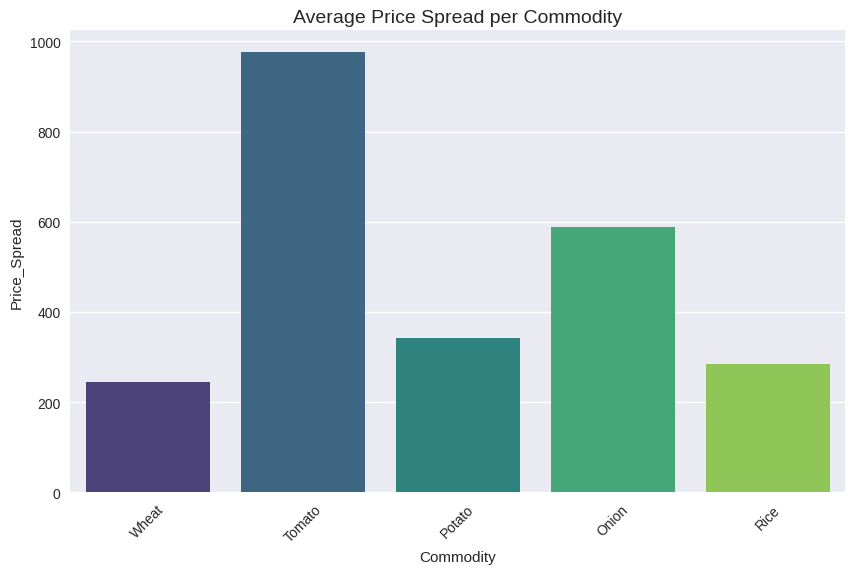

In [11]:
# Step 11: Price spread (Max - Min) per commodity
df["Price_Spread"] = df["Max_Price"] - df["Min_Price"]

plt.figure(figsize=(10,6))
sns.barplot(x="Commodity", y="Price_Spread", data=df, estimator="mean", ci=None, palette="viridis")
plt.title("Average Price Spread per Commodity", fontsize=14)
plt.xticks(rotation=45)
plt.show()


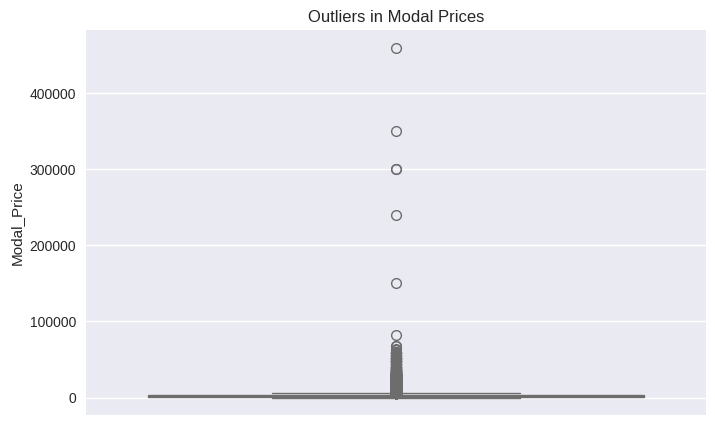

In [12]:
# Step 12: Outlier detection for Modal Price
plt.figure(figsize=(8,5))
sns.boxplot(y="Modal_Price", data=df, color="salmon")
plt.title("Outliers in Modal Prices")
plt.show()
